In this notebook we compute the enclosure for the Lyapunov exponent as $\alpha$ varies and $\sigma$ varies.

In [2]:
using PlateauExperiment, IntervalArithmetic

┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/aiclr/src/BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 6 threads
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/aiclr/src/BallArithmetic.jl:27


Generating forwards to /home/isaia/.julia/artifacts/7e6d3d1a151a3d510c0e5a4c8f2c792f53e39777/lib/libopenblas64_.so (clear: 0, verbose: 1, suffix_hint: '(null)')
 -> Autodetected symbol suffix "64_"
 -> Autodetected interface ILP64 (64-bit)
 -> Autodetected normal complex return style
 -> Autodetected gfortran calling convention
 -> CBLAS detected
Processed 5123 symbols; forwarded 4922 symbols with 64-bit interface and mangling to a suffix of "64_"


In [6]:
using Plots

In [ ]:
plt = plot()
K = 896

for j in range(start = 0, step = 1, stop = K)
    β = 51/64+j/8192
    lambda = MultipleExperiments(interval(3), interval(β), 128, [interval(x) for x in range(0.1, 1, 100)])
    maskpos = lambda .> 0.0
    vpos = range(0.1, 1, 100)[maskpos]
    scatter!(plt, vpos, fill(β, length(vpos)), markershape = :+, color = :blue, label = "")
    maskneg = lambda .< 0.0
    vneg = range(0.1, 1, 100)[maskneg]
    scatter!(plt, vneg, fill(β, length(vneg)), markershape = :hline, color = :red, label = "")
end

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21
┌ Info: 257
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 128
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
┌ Info: ϵ
│   ϵ = 8.097516223968822e-13
└ @ PlateauExperiment /home/isaia/Code/PlateauExperiment.jl/src/Experiment.jl:67
┌ Info: Norms
└ @ PlateauExperiment /home/isaia/Code/PlateauExperiment.jl/src/Experiment.jl:76
┌ Info: 0.6177345199949436
└ @ PlateauExperiment /home/isaia/Code/PlateauExperiment.jl/src/Experiment.jl:77
┌ Info: 0.6177345199949436
└ @ PlateauExperiment /home/isaia/

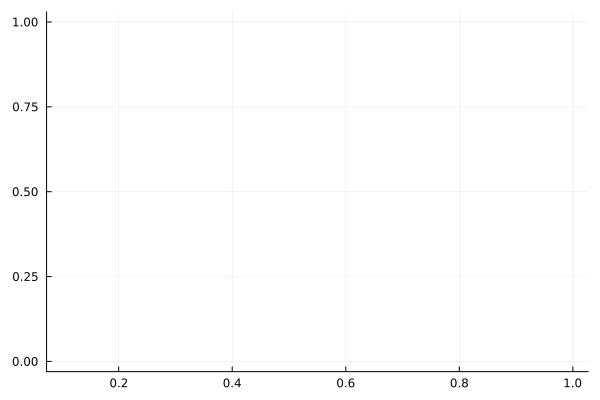

In [13]:
display(plt)